<a href="https://colab.research.google.com/github/Dee-M123/DM-Project1-Portfolio-HR-Analytics/blob/main/Notebooks/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

Load data and do a general checkout of uploaded dataset.

This is from the already explored dataset (eda).

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/Dee-M123/DM-Project1-Portfolio-HR-Analytics/refs/heads/main/Data/Uncleaned_employees_final_dataset%20(1).csv")

In [36]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51


**Data has already been explored - we can move ahead with cleaning **

As there are only have two duplicated rows, these can be droped to avoid affecting of numerical calculations

In [37]:
df = df.drop_duplicates()

cleaning numeric data types to make sure they are uniform also making sure that categorical columns have no whitespace in them like with the duplicates, we do not need inflated columns.

In [38]:

# strip whitespace for object (categorical/text) cols
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

# convert binary / booly numeric columns to int
df["KPIs_met_more_than_80"] = df["KPIs_met_more_than_80"].astype(int)
df["awards_won"] = df["awards_won"].astype(int)

# ensure numeric columns are numeric
numeric_cols = ["no_of_trainings","age","previous_year_rating","length_of_service","KPIs_met_more_than_80","awards_won","avg_training_score"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

**Handling missing values**


For this specific data set, there are a number of reasons missing values in the education and previous_year_rating column; both are quite relevant, so droping the rows is not an option.

From our exploration, we know that every single employe with miss previous year rating has exactly one year of service.

In [39]:
df[df["previous_year_rating"].isna()]["length_of_service"].describe()

,length_of_service
count,1363.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [40]:
df["previous_year_rating"].isna().astype(int) # view missing entry
df["is_new_hire"] = df["previous_year_rating"].isna().astype(int)





Filling in the missing data with 0 to denote not applicable

In [41]:
df["previous_year_rating"] = df["previous_year_rating"].fillna(0)

Restructured the order of the columns, so that the columns are next to each other.


In [42]:
df = df[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating','is_new_hire','length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score']]


df.head(2)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,is_new_hire,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,0.0,1,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,0,5,0,0,51


For education, we can simply replace nan with unknown, that is still useful information to have for HR analytics

In [43]:
df["education"] = df["education"].fillna("Unknown")


To verify that all columns have no missing values anymore.

In [44]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
is_new_hire,0


We want to make sure gender is clearly defined with one specific denotation that can not be mistaken. Having uniform letter-casing

In [45]:
df["gender"] = df["gender"].str.lower().replace({"m":"Male","f":"Female","male":"Male","female":"Female"})
df["gender"]

,gender
0,Male
1,Female
2,Male
3,Female
4,Male
...,...
17410,Male
17411,Male
17412,Female
17413,Male


**Grouping Data**

The is an uneven distribution of region, grouping regions with lower records into samll sub-regions is ideal in this case.

In [46]:

region_counts = df["region"].value_counts()
small_regions = region_counts[region_counts < (0.03*len(df))].index  # <3% threshold
df["region_grouped"] = df["region"].replace(small_regions, "Other")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,is_new_hire,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,region_grouped
0,8724,Technology,region_26,Bachelors,Male,sourcing,1,24,0.0,1,1,1,0,77,region_26
1,74430,HR,region_4,Bachelors,Female,other,1,31,3.0,0,5,0,0,51,region_4
2,72255,Sales & Marketing,region_13,Bachelors,Male,other,1,31,1.0,0,4,0,0,47,region_13
3,38562,Procurement,region_2,Bachelors,Female,other,3,31,2.0,0,9,0,0,65,region_2
4,64486,Finance,region_29,Bachelors,Male,sourcing,1,30,4.0,0,7,0,0,61,Other


Restructured the columns so that sub-region is next to regions

In [47]:
df = df[['employee_id', 'department', 'region','region_grouped', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'is_new_hire', 'length_of_service', 'KPIs_met_more_than_80',
       'awards_won', 'avg_training_score']]

In [48]:
df[['region','region_grouped']].value_counts()

,,count
region,region_grouped,
region_2,region_2,3918
region_22,region_22,1990
region_7,region_7,1486
region_13,region_13,860
region_15,region_15,843
region_26,region_26,748
region_31,region_31,646
region_4,region_4,571
region_27,Other,516


**Looking at outliers **

 Checking how to hundle any exisitng outliers, assessing if there is a need to drop them or not

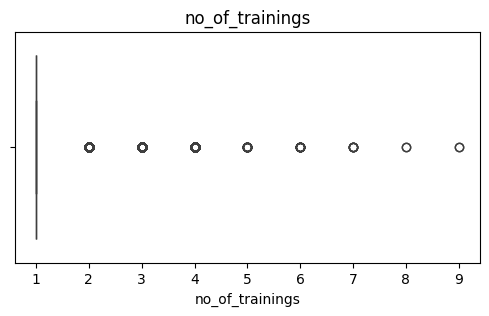

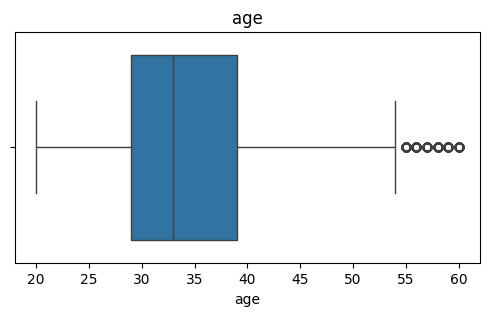

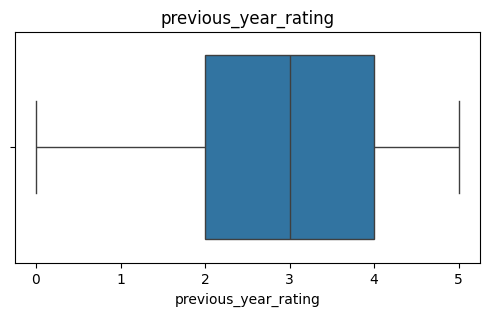

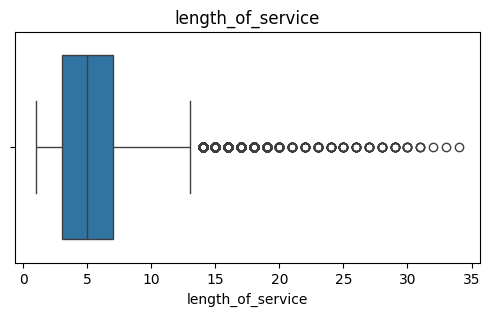

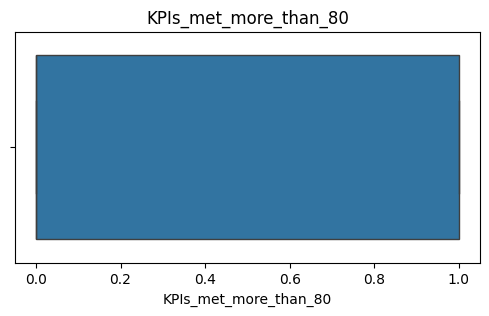

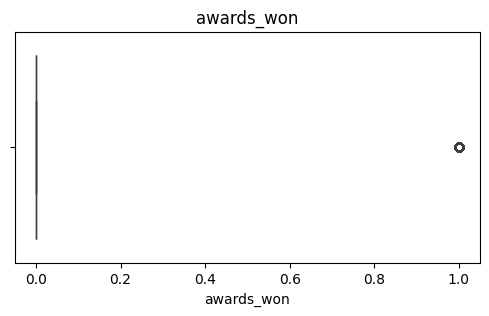

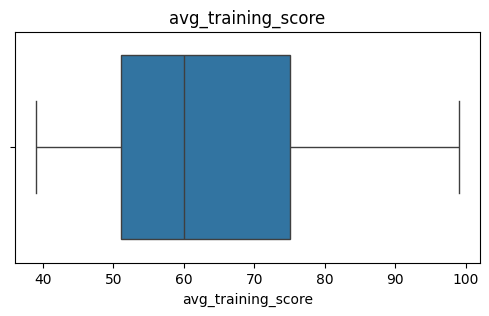

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

for c in ["no_of_trainings","age","previous_year_rating","length_of_service","KPIs_met_more_than_80","awards_won","avg_training_score"]:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[c])
    plt.title(c)
    plt.show()

    #The outliers in this plots below can not be dropped as they would be useful in the overall understanding of the data and problem statements

Save the cleaned data pipeline. No need to encode as we only focuse to find existing relationships across columns.

In [50]:
df.to_csv("cleaned_employees_dataset.csv", index=False)

**Theorising based on the information above.**

The following areas are interesting possiblities to have a look into, where performance evaluation is concerned:

Hypothesis 1: Employees who attend more trainings have higher average training scores.

Hypothesis 2: Employees who met KPIs (> 80%) in the past year had more training sessions.

Hypothesis 3: New hires have lower KPI achievement rates than tenured employees.

Hypothesis 4: Employees in larger departments have a higher number of   trainings.
